# Filters and Image Convolutions

In [142]:
import requests
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt

plt.rcParams["image.cmap"] = "bone"

In [127]:
img_url = ("http://www.cam.ac.uk/sites/www.cam.ac.uk"
           "/files/styles/content-580x288/public/news"
           "/research/news/wolfweb.jpg?itok=57vxvXhu")

img_req = requests.get(img_url)
face = imread(img_req.content)[:, :, 0]
face.shape

(288, 590)

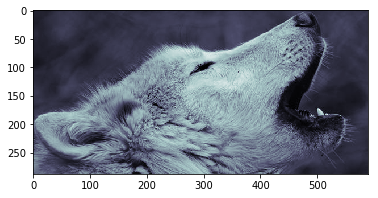

In [143]:
plt.imshow(face);

#### What will applying the next filter to the image above do?

In [123]:
mask = np.array([
    [0, 1, -1,  0],
    [1, 3, -3, -1],
    [1, 3, -3, -1],
    [0, 1, -1,  0]
])

mask.shape

(4, 4)

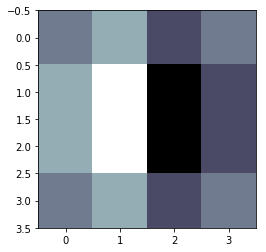

In [144]:
plt.imshow(mask);

Recall, for an $n_h\times n_w$ image convoluted with an $f\times f$ filter, the resulting image size is
$$
    (n_h - f + 1)\times(n_w - f + 1)
$$

In [104]:
def conv_operation(subset, filtermap):
    """
    Apply the convolution operation to a subset
    of an n_h X n_w image to a map f X f.
    
    Parameters
    ----------
    subset: f X f numpy array
        subset of an n_h X n_h image
    filter: f X f numpy array
        the filter to apply
    """
    return np.sum(subset * filtermap)

def convolution(image, filtermap):
    """
    Apply the convolution operation to an image n_h X n_w
    by a filter f X f considering a padding=0, and
    stride=1; with n_h, n_w > f
    
    Parameters
    ----------
    image: a numpy array of shape n_h X n_w
    filtermap: a numpy array of shape f X f
    
    Returns
    -------
    (n_h - f + 1) X (n_w - f + 1) numpy array
    """
    n_h, n_w = image.shape
    f = filtermap.shape[0]
    
    conv_image_h, conv_image_w = n_h - f + 1, n_w - f + 1
    img_output = np.zeros((conv_image_h, conv_image_w))

    for h in range(conv_image_h):
        for w in range(conv_image_w):
            conv_pixel = (h, w)
            img_subset = image[h:(h + f), w:(w + f)]
            img_output[conv_pixel] = conv_operation(img_subset, filtermap)
    
    return img_output

In [125]:
conv_face = convolution(face, mask)

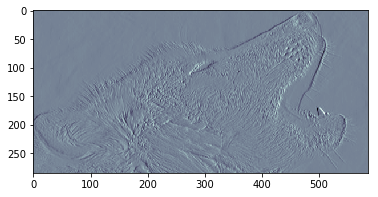

In [145]:
plt.imshow(conv_face)

**Trying vertical and horizontal edge detectors**

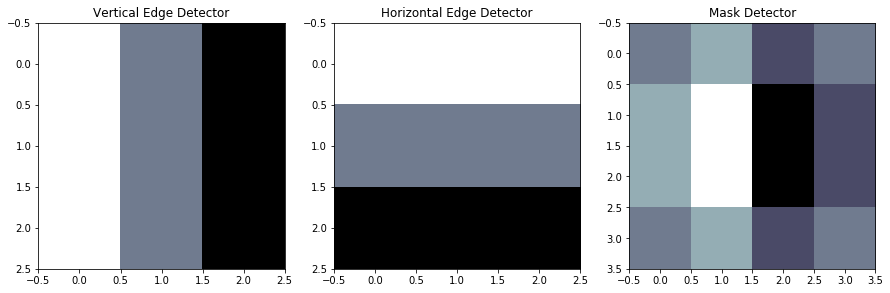

In [154]:
vertical_detector = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

horizontal_detector = np.array([
    [ 1,  1,  1],
    [ 0,  0,  0],
    [-1, -1, -1]
])

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.imshow(vertical_detector)
ax2.imshow(horizontal_detector)
ax2.imshow(horizontal_detector)
ax3.imshow(mask)

ax1.set_title("Vertical Edge Detector")
ax2.set_title("Horizontal Edge Detector")
ax3.set_title("Mask Detector");

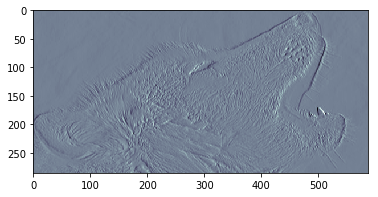

In [147]:
plt.imshow(convolution(face, vertical_detector));

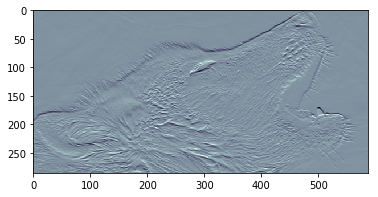

In [148]:
plt.imshow(convolution(face, horizontal_detector));